In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.ticker as ticker
# plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})



In [229]:
eth = pd.read_csv("average_eth_transaction_cost.csv")
matic = pd.read_csv("average_matic_transaction_cost.csv")
eth = eth.rename(columns={'avg_tx_gas_cost': 'avg_tx_gas_cost_ether'})
matic = matic.rename(columns={'avg_tx_gas_cost': 'avg_tx_gas_cost_matic'})
df = pd.merge(eth, matic, on=['tx_date','tx_date'])
df.drop(['Unnamed: 0_x', "Unnamed: 0_y"], axis=1, inplace=True)

df['tx_date'] = pd.to_datetime(df['tx_date'])
df['avg_tx_gas_cost_matic'] = df['avg_tx_gas_cost_matic']*0.000572

In [222]:
df.head()

,sum_tx_ether,avg_tx_gas_cost_ether,tx_date,sum_tx_matic,avg_tx_gas_cost_matic
0,2.485365e+06,0.002507,2021-01-01,137854.364445,0.000688
1,2.538941e+06,0.003606,2021-01-02,128854.979807,0.001057
2,5.777348e+06,0.006067,2021-01-03,582238.473001,0.002482
3,7.549099e+06,0.007898,2021-01-04,677450.913563,0.000865
4,4.720090e+06,0.004710,2021-01-05,228698.046674,0.001356


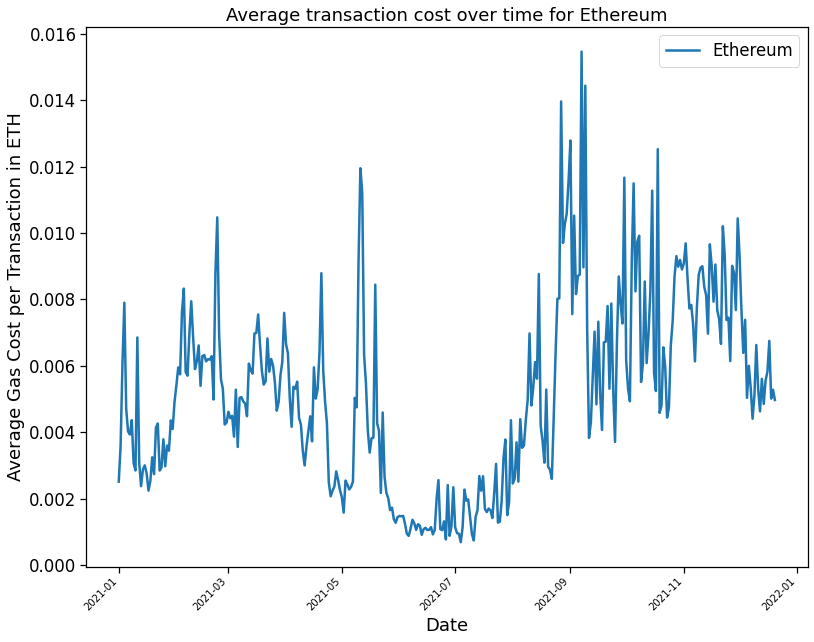

In [234]:

f, g = plt.subplots(figsize=(12, 9))
plot_ = sns.lineplot(x="tx_date", y="avg_tx_gas_cost_ether", data=df, palette="Blues_d")
# sns.lineplot(x="tx_date", y="avg_tx_gas_cost_matic", data=df, palette="red_d")
plt.title("Average transaction cost over time for Ethereum")
plt.ylabel("Average Gas Cost per Transaction in ETH")
plt.xlabel("Date")


# plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

        
plt.legend(labels=["Ethereum"])
plt.tight_layout()
plt.xticks(rotation=45, ha="right",fontsize=10)
plt.savefig('transaction_cost.png',format="png",bbox_inches='tight',transparent=False, pad_inches=0)
plt.show(g)

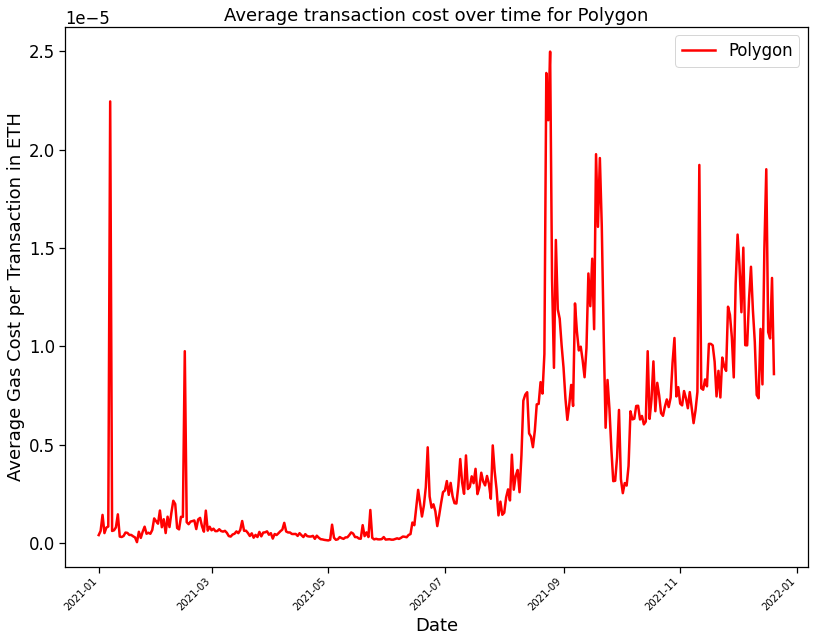

In [232]:

f, g = plt.subplots(figsize=(12, 9))
plot_ = sns.lineplot(x="tx_date", y="avg_tx_gas_cost_matic", data=df, palette="red_d", color='red')
# sns.lineplot(x="tx_date", y="avg_tx_gas_cost_matic", data=df, palette="red_d")
plt.title("Average transaction cost over time for Polygon")
plt.ylabel("Average Gas Cost per Transaction in ETH")
plt.xlabel("Date")


# plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

        
plt.legend(labels=["Polygon"])
plt.tight_layout()
plt.xticks(rotation=45, ha="right",fontsize=10)
plt.savefig('transaction_cost.png',format="png",bbox_inches='tight',transparent=False, pad_inches=0)
plt.show(g)

In [5]:
df.head()

,sum_tx_ether,avg_tx_gas_cost_ether,tx_date,sum_tx_matic,avg_tx_gas_cost_matic
0,2.485365e+06,0.002507,2021-01-01,137854.364445,0.000688
1,2.538941e+06,0.003606,2021-01-02,128854.979807,0.001057
2,5.777348e+06,0.006067,2021-01-03,582238.473001,0.002482
3,7.549099e+06,0.007898,2021-01-04,677450.913563,0.000865
4,4.720090e+06,0.004710,2021-01-05,228698.046674,0.001356


In [223]:
cols_to_norm = ['sum_tx_matic','avg_tx_gas_cost_ether']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

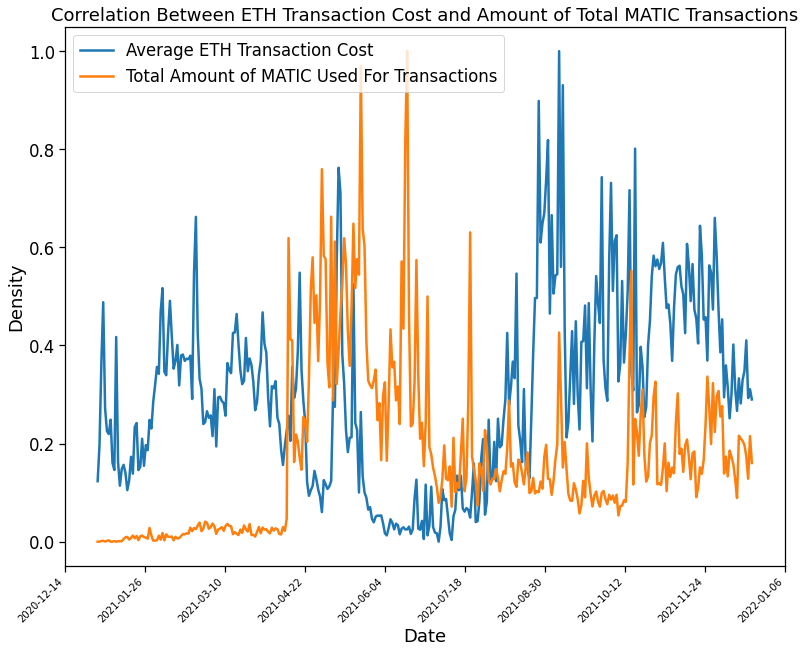

In [224]:
# Our Assumption was that if transaction costs for ether would encrease,
# Then People would use Polygon chain for transactions, however 
# this is not necessarily true.
# Plot below shows Average Gast Cost for ether transactions normalized between (0,1) range
# and sum of all transaction values (total amount of Matic), that was used for transactions for that date
f, g = plt.subplots(figsize=(12, 9))
plot_ = sns.lineplot(x="tx_date", y="avg_tx_gas_cost_ether", data=df, palette="Blues_d")
sns.lineplot(x="tx_date", y="sum_tx_matic", data=df, palette="red_d")
plt.title("Correlation Between ETH Transaction Cost and Amount of Total MATIC Transactions")
plt.ylabel("Density")
plt.xlabel("Date")


plot_.xaxis.set_major_locator(ticker.LinearLocator(10))

        
plt.legend(labels=["Average ETH Transaction Cost","Total Amount of MATIC Used For Transactions"])
plt.tight_layout()
plt.xticks(rotation=45, ha="right",fontsize=10)
plt.savefig('correlation.png',format="png",bbox_inches='tight',transparent=False, pad_inches=0)
plt.show(g)

In [153]:
aave1 = pd.read_csv("aave1.csv")
aave2 = pd.read_csv("aave2.csv")

In [155]:
frames = [aave1, aave2]
  
aave = pd.concat(frames)

In [156]:
aave.head()

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $4023.77/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,CurrentValue @ $4025.18/Eth
0,0x7f10004def891a9965e972e57ecb8b93c517b5d4d7e4...,11367463.0,1606836555.0,12/1/20 15:29,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.034249,137.811429,586.23,NaN,NaN,Deposit,NaN
1,0xaf5e3f50a65040286ce2a4092947c945b20e334ad911...,11367790.0,1606840850.0,12/1/20 16:40,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.017137,68.954839,586.23,NaN,NaN,Deposit,NaN
2,0xcd650142f38eaa8304cd322f13f7721029ab1ac22ecb...,11367794.0,1606840938.0,12/1/20 16:42,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.009855,39.654253,586.23,NaN,NaN,Deposit,NaN
3,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,11367824.0,1606841218.0,12/1/20 16:46,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.026352,106.035357,586.23,NaN,NaN,Borrow,NaN
4,0x17869b1999e221cb74ab4fc8c9f7087097e6e27b50dd...,11367843.0,1606841476.0,12/1/20 16:51,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.028205,113.491479,586.23,NaN,NaN,Withdraw,NaN


In [157]:
aggregate = aave.groupby(['ErrCode'], as_index=False).sum()

In [160]:
aggregate['value'] = aggregate['CurrentValue @ $4023.77/Eth'] + aggregate["CurrentValue @ $4025.18/Eth"]

In [161]:
aggregate = aggregate.sort_values(by=['value'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Borrow'),
  Text(1, 0, 'Deposit'),
  Text(2, 0, 'Withdraw'),
  Text(3, 0, 'Repay'),
  Text(4, 0, 'Flash Loan'),
  Text(5, 0, 'Swap Borrow Rate Mode'),
  Text(6, 0, 'Out of gas'),
  Text(7, 0, 'Set User Use Reserve As Collateral'),
  Text(8, 0, 'Liquidation Call'),
  Text(9, 0, 'Transfer'),
  Text(10, 0, 'Bad instruction'),
  Text(11, 0, 'Reverted')])

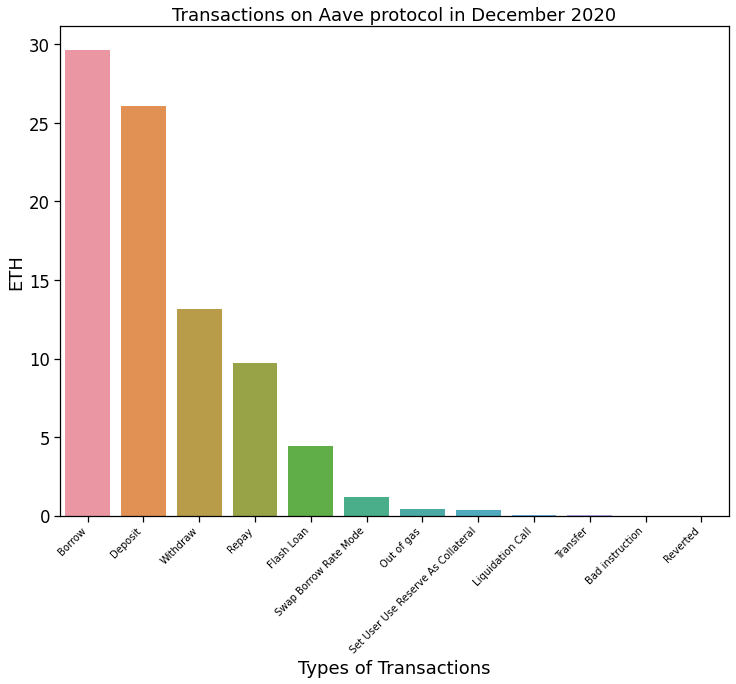

In [235]:
f, g = plt.subplots(figsize=(12, 9))
plot = sns.barplot(x="ErrCode", y="value", data=aggregate)
# plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.title("Transactions on Aave protocol in December 2020")
plt.ylabel("ETH")
plt.xlabel("Types of Transactions")
plt.xticks(rotation=45, ha="right",fontsize=10)
# plot.show(g)

In [198]:
borrow = aave.loc[aave['ErrCode'] == 'Borrow']

In [199]:
aave.head()

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $4023.77/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,CurrentValue @ $4025.18/Eth
0,0x7f10004def891a9965e972e57ecb8b93c517b5d4d7e4...,11367463.0,1606836555.0,12/1/20 15:29,0xdad4c11e8cc6a5c37808d3b31b3b284809f702d1,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.034249,137.811429,586.23,NaN,NaN,Deposit,NaN
1,0xaf5e3f50a65040286ce2a4092947c945b20e334ad911...,11367790.0,1606840850.0,12/1/20 16:40,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.017137,68.954839,586.23,NaN,NaN,Deposit,NaN
2,0xcd650142f38eaa8304cd322f13f7721029ab1ac22ecb...,11367794.0,1606840938.0,12/1/20 16:42,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.009855,39.654253,586.23,NaN,NaN,Deposit,NaN
3,0xc70f4c3f447f6a88e9fbb87ac1394b589e469ee57dda...,11367824.0,1606841218.0,12/1/20 16:46,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.026352,106.035357,586.23,NaN,NaN,Borrow,NaN
4,0x17869b1999e221cb74ab4fc8c9f7087097e6e27b50dd...,11367843.0,1606841476.0,12/1/20 16:51,0xbd723fc4f1d737dcfc48a07fe7336766d34cad5f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.028205,113.491479,586.23,NaN,NaN,Withdraw,NaN


In [200]:
borrow['CurrentValue @ $4023.77/Eth'] = borrow['CurrentValue @ $4023.77/Eth'].fillna(0)
borrow["CurrentValue @ $4025.18/Eth"] = borrow["CurrentValue @ $4025.18/Eth"].fillna(0)

/var/folders/fc/gl3zmk6171v42g3jkyz3rx5h0000gn/T/ipykernel_3182/4120751659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borrow['CurrentValue @ $4023.77/Eth'] = borrow['CurrentValue @ $4023.77/Eth'].fillna(0)
/var/folders/fc/gl3zmk6171v42g3jkyz3rx5h0000gn/T/ipykernel_3182/4120751659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borrow["CurrentValue @ $4025.18/Eth"] = borrow["CurrentValue @ $4025.18/Eth"].fillna(0)


In [201]:
borrow['value'] = borrow['CurrentValue @ $4023.77/Eth'] + borrow["CurrentValue @ $4025.18/Eth"]

/var/folders/fc/gl3zmk6171v42g3jkyz3rx5h0000gn/T/ipykernel_3182/494028309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borrow['value'] = borrow['CurrentValue @ $4023.77/Eth'] + borrow["CurrentValue @ $4025.18/Eth"]


In [202]:
borrow.head()

,Txhash,Blockno,UnixTimestamp,DateTime,From,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $4023.77/Eth,TxnFee(ETH),TxnFee(USD),Historical $Price/Eth,Status,ErrCode,Method,CurrentValue @ $4025.18/Eth,value
0x90b25602c9b9d575b8a0afadf40801e39393e5b76a73f63ed129c46fb6d340c8,11447795,1.607905e+09,2020-12-14 00:11:36,0xa2888a8b86fbc2bce538305257003e7159a9192f,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.0,31.538364,586.35,NaN,NaN,Borrow,NaN,0.007835,0.007835
0xedcf844f473159033f0a3e29e463d1bcd79f52dce1f627c8e3250ecf68fcfb63,11447821,1.607905e+09,2020-12-14 00:19:15,0x48f64de392581170695a74139512bcbc3913c9b3,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.0,42.269633,586.35,NaN,NaN,Borrow,NaN,0.010501,0.010501
0x54ac767e52c536cf5cedac764bbf57676785bafe88170d21e7ab76d6705c4909,11447835,1.607905e+09,2020-12-14 00:23:24,0x6e867b9ceda09ccb743f823d05c84cf806afeb8e,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.0,63.202591,586.35,NaN,NaN,Borrow,NaN,0.015702,0.015702
0x81b6bab526143869c80d0335f78b4a9d617f71295614a45dc193d62dc82fd3e1,11447836,1.607905e+09,2020-12-14 00:23:58,0x9661409efd4790c8d0258562bfa4ee4c50b78fd1,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.0,43.074767,586.35,NaN,NaN,Borrow,NaN,0.010701,0.010701
0x6855d10b729b721b2aca094e961ddcd5b0154ac8149cf0b6938f72c962b27cb2,11447982,1.607908e+09,2020-12-14 00:58:37,0x0ef6e547dd86de09f0e8ece1e5a9f5ccb335ade1,0x7d2768de32b0b80b7a3454c06bdac94a69ddc7a9,NaN,0.0,0.0,0.0,0.0,45.973374,586.35,NaN,NaN,Borrow,NaN,0.011421,0.011421


(array([ -64.7       ,   93.45555556,  251.61111111,  409.76666667,
         567.92222222,  726.07777778,  884.23333333, 1042.38888889,
        1200.54444444, 1358.7       ]),
 [Text(-64.7, 0, ''),
  Text(93.45555555555556, 0, '2020-12-14 19:18:22'),
  Text(251.61111111111114, 0, '2020-12-16 01:37:52'),
  Text(409.7666666666667, 0, '2020-12-17 09:31:19'),
  Text(567.9222222222222, 0, '2020-12-18 11:37:02'),
  Text(726.0777777777778, 0, '2020-12-19 11:12:59'),
  Text(884.2333333333333, 0, '2020-12-20 16:58:02'),
  Text(1042.388888888889, 0, '2020-12-22 05:51:26'),
  Text(1200.5444444444445, 0, '2020-12-23 08:00:18'),
  Text(1358.7, 0, '')])

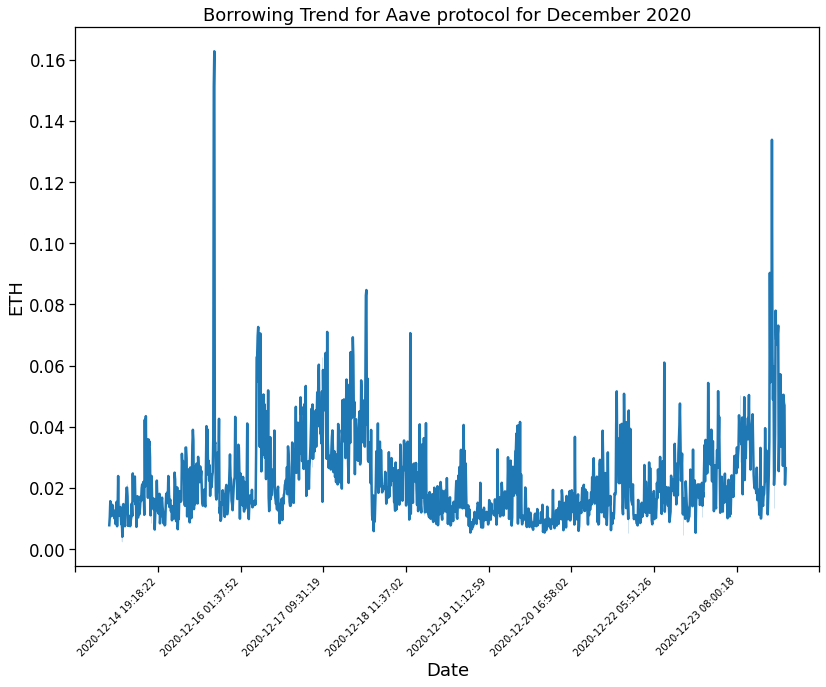

In [236]:
f, g = plt.subplots(figsize=(12, 9))
plot_ = sns.lineplot(data=borrow, x="UnixTimestamp", y="value")
plt.title("Borrowing Trend for Aave protocol for December 2020")
plt.ylabel("ETH")
plt.xlabel("Date")
plot_.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.tight_layout()
plt.xticks(rotation=45, ha="right",fontsize=10)

In [140]:
borrow['UnixTimestamp'] = borrow['UnixTimestamp'][1].split(' ')[0]

/var/folders/fc/gl3zmk6171v42g3jkyz3rx5h0000gn/T/ipykernel_3182/1162703096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  borrow['UnixTimestamp'] = borrow['UnixTimestamp'][1].split(' ')[0]


In [150]:
df = borrow.groupby(['UnixTimestamp'][1], as_index=False).sum()

IndexError: list index out of range

In [152]:
borrow['UnixTimestamp'][-1]

'2021-01-01'

In [149]:
df.head()

,UnixTimestamp,Txhash,Blockno,To,ContractAddress,Value_IN(ETH),Value_OUT(ETH),CurrentValue @ $4020.78/Eth,TxnFee(ETH),TxnFee(USD),Method
0,2021-01-01,13571919716,1886520282616,0.0,0,0,0,46.327738,186273.642129,1066680.57,0.0
